In [18]:
import numpy as np # linear algebra
import pandas as pd 
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [19]:
data = pd.read_csv('../../Datasets/ORCL.csv') 
data.head()


,Date,Open,High,Low,Close,Volume
0,2014-01-02,37.78,38.03,37.550,37.84,18162100
1,2014-01-03,37.65,37.86,37.560,37.62,11693900
2,2014-01-06,37.64,37.80,37.415,37.47,15329400
3,2014-01-07,37.66,37.93,37.500,37.85,16792200
4,2014-01-08,37.79,37.91,37.560,37.72,16111600


In [20]:
# Reset index
data.reset_index(drop=True, inplace=True)

# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Fill NaN values in numeric columns with the mean of those columns
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

# Display the first few rows of the DataFrame
print(data.head())

         Date   Open   High     Low  Close    Volume
0  2014-01-02  37.78  38.03  37.550  37.84  18162100
1  2014-01-03  37.65  37.86  37.560  37.62  11693900
2  2014-01-06  37.64  37.80  37.415  37.47  15329400
3  2014-01-07  37.66  37.93  37.500  37.85  16792200
4  2014-01-08  37.79  37.91  37.560  37.72  16111600


In [21]:
# Calculate moving average
ma_day = [5, 10, 20, 50]  # Common short-term and long-term windows
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(window=ma).mean()

# Calculate Exponential moving average
for ma in ma_day:
    column_name = f"EMA for {ma} days"
    data[column_name] = data['Close'].ewm(span=ma, adjust=False).mean()

# Volatility (Standard Deviation): Capture price fluctuations:
# for ma in ma_day:
#     column_name = f"Volatility_{ma}d"
#     data[column_name] = data['Close'].rolling(window=ma).std()

# Calculate RSI
def compute_RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data['RSI_14'] = compute_RSI(data)

# MACD
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2




            Date    Open    High       Low   Close    Volume  MA for 5 days  \
0     2014-01-02   37.78   38.03   37.5500   37.84  18162100            NaN   
1     2014-01-03   37.65   37.86   37.5600   37.62  11693900            NaN   
2     2014-01-06   37.64   37.80   37.4150   37.47  15329400            NaN   
3     2014-01-07   37.66   37.93   37.5000   37.85  16792200            NaN   
4     2014-01-08   37.79   37.91   37.5600   37.72  16111600         37.700   
...          ...     ...     ...       ...     ...       ...            ...   
2532  2024-01-25  114.89  116.18  114.3500  115.00   8877205        112.182   
2533  2024-01-26  114.64  115.48  114.2746  114.64   5541900        113.176   
2534  2024-01-29  114.19  114.59  113.0100  113.75   7014424        113.906   
2535  2024-01-30  113.36  114.40  112.6300  114.16   8231882        114.372   
2536  2024-01-31  113.81  114.27  111.6700  111.70   7386705        113.850   

      MA for 10 days  MA for 20 days  MA for 50 day

,count,mean,std,min,25%,50%,75%,max
Open,2537.0,5.886468e+01,2.173778e+01,3.380000e+01,4.184000e+01,5.087000e+01,7.256000e+01,1.271400e+02
High,2537.0,5.944919e+01,2.201210e+01,3.423000e+01,4.204000e+01,5.136000e+01,7.369000e+01,1.275400e+02
Low,2537.0,5.834973e+01,2.149084e+01,3.313000e+01,4.149000e+01,5.050000e+01,7.178000e+01,1.251500e+02
Close,2537.0,5.890245e+01,2.176134e+01,3.394000e+01,4.181000e+01,5.090000e+01,7.278000e+01,1.267100e+02
Volume,2537.0,1.300222e+07,7.678662e+06,2.168187e+06,8.395241e+06,1.139949e+07,1.522997e+07,8.667910e+07
MA for 5 days,2533.0,5.887637e+01,2.169511e+01,3.429600e+01,4.184400e+01,5.076400e+01,7.256600e+01,1.252860e+02
MA for 10 days,2528.0,5.884323e+01,2.161626e+01,3.448800e+01,4.184325e+01,5.070650e+01,7.212725e+01,1.226360e+02
MA for 20 days,2518.0,5.878556e+01,2.148394e+01,3.498250e+01,4.187087e+01,5.027675e+01,7.181762e+01,1.192920e+02
MA for 50 days,2488.0,5.862302e+01,2.111803e+01,3.584140e+01,4.176915e+01,5.001060e+01,7.206120e+01,1.175242e+02
EMA for 5 days,2537.0,5.884321e+01,2.168442e+01,3.428715e+01,4.176077e+01,5.064006e+01,7.241791e+01,1.250646e+02


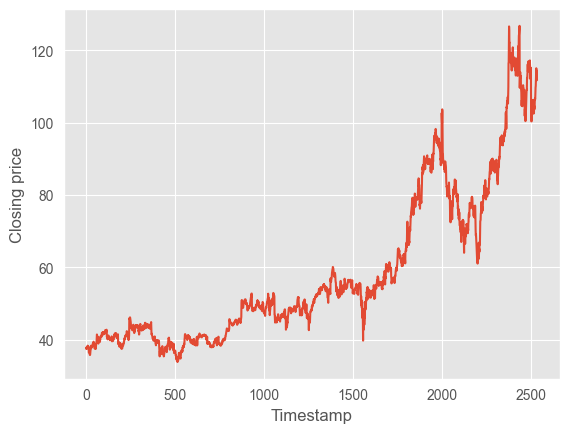

In [22]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [23]:
data.dropna(inplace=True)
data.head(500)

,Date,Open,High,Low,Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,EMA for 5 days,EMA for 10 days,EMA for 20 days,EMA for 50 days,RSI_14,MACD
49,2014-03-14,37.69,38.0000,37.5002,37.60,14308300,38.306,38.724,38.5190,37.9002,38.154674,38.418025,38.379121,38.090277,44.130435,0.139102
50,2014-03-17,37.80,38.4800,37.8000,38.22,14981300,38.178,38.695,38.5310,37.9078,38.176449,38.382020,38.363967,38.095364,49.706458,0.111277
51,2014-03-18,38.37,38.9400,38.1550,38.84,29707200,38.166,38.638,38.5745,37.9322,38.397633,38.465289,38.409303,38.124565,53.102190,0.137668
52,2014-03-19,37.80,38.9600,37.4000,38.55,45154900,38.172,38.543,38.6085,37.9538,38.448422,38.480691,38.422703,38.141249,46.240602,0.133641
53,2014-03-20,38.50,38.6900,38.0100,38.37,18960200,38.316,38.434,38.6135,37.9642,38.422281,38.460565,38.417684,38.150220,43.071161,0.114604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2016-03-02,37.76,37.8899,37.4300,37.76,12791151,37.356,37.048,36.3460,35.8580,37.402545,37.034345,36.566851,36.413033,71.768707,0.484591
545,2016-03-03,37.61,37.9100,37.3950,37.89,8832188,37.476,37.174,36.4560,35.8888,37.565030,37.189919,36.692866,36.470953,76.991150,0.526549
546,2016-03-04,38.00,38.1600,37.7701,37.89,10638066,37.662,37.285,36.5280,35.9182,37.673353,37.317206,36.806878,36.526602,73.737374,0.553421
547,2016-03-07,37.54,38.4500,37.5200,38.36,13011008,37.978,37.410,36.6610,35.9536,37.902236,37.506805,36.954795,36.598500,75.285171,0.605662


In [24]:
# updated Code

feature_columns = [
    'Close',          # Most important feature (direct price information)
    'Low',            # Important price-related feature
    'High',           # Important price-related feature
    'Open',           # Important price-related feature
    'EMA for 5 days', # Short-term trend indicator
    'MA for 5 days',  # Short-term trend indicator
    'RSI_14'          # Momentum indicator
]

from sklearn.model_selection import train_test_split
import numpy as np

X = []
Y = []
window_size = 15

# Iterating through the dataset to create inputs and targets
for i in range(1, len(df) - window_size - 1, 1):
    first_close = df.iloc[i, df.columns.get_loc('Close')]  # Normalize using "Close" price
    temp = []
    temp2 = []
    
    for j in range(window_size):
        # Normalize each feature in the feature_columns list
        normalized_features = []
        for feature in feature_columns:
            if feature == 'Close':
                # Normalize "Close" relative to the first_close
                normalized_value = (df.iloc[i + j, df.columns.get_loc(feature)] - first_close) / first_close
            else:
                # For other features, normalize them directly (or use their raw values if normalization isn't required)
                normalized_value = df.iloc[i + j, df.columns.get_loc(feature)]
            normalized_features.append(normalized_value)
        
        # Append the normalized features for this time step
        temp.append(normalized_features)
    
    # Calculate the target (normalized change in "Close" price)
    target = (df.iloc[i + window_size, df.columns.get_loc('Close')] - first_close) / first_close
    temp2.append(target)
    
    # Append the input and target to X and Y
    X.append(np.array(temp))  # Each sample has shape (window_size, len(feature_columns))
    Y.append(np.array(temp2).reshape(1, 1))

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Converting lists to numpy arrays
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

# Verify the shape of train_X
print("Shape of train_X before reshaping:", train_X.shape)

# Reshaping the data for CNN models
# Assuming train_X has shape (num_samples, window_size, num_features)
train_X = train_X.reshape(train_X.shape[0], 1, train_X.shape[1], train_X.shape[2])  
test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1], test_X.shape[2])

# Printing the number of training and testing samples
print("Shape of train_X after reshaping:", train_X.shape)
print("Shape of test_X after reshaping:", test_X.shape)
print("Number of training samples:", len(train_X))
print("Number of testing samples:", len(test_X))

Shape of train_X before reshaping: (1976, 15, 7)
Shape of train_X after reshaping: (1976, 1, 15, 7)
Shape of test_X after reshaping: (495, 1, 15, 7)
Number of training samples: 1976
Number of testing samples: 495


In [25]:
# Check if there are any NaN values

print(np.isnan(train_X).any(), np.isnan(train_Y).any())
print(np.isinf(train_X).any(), np.isinf(train_Y).any())

False False
False False


In [26]:
from keras.models import load_model

# load the model
model = load_model('improved_cnn_lstm_model.keras')

c:\Users\timoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 36 variables whereas the saved optimizer has 70 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [27]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.862997
R2 Score: 0.862997
Max Error: 0.133995


In [28]:
# make predictions
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [29]:
from scipy.signal import savgol_filter

def plot_predictions(test_label, predicted, title="Actual V Stock Price Prediction"):
    # Apply smoothing to both lines
    window_length = 5  # Must be odd; adjust this value to control smoothing amount
    polyorder = 1
    
    # Smooth both actual and predicted values
    test_label_smooth = savgol_filter(test_label.flatten(), window_length, polyorder)
    predicted_smooth = savgol_filter(predicted.flatten(), window_length, polyorder)
    
    plt.figure(figsize=(15, 6))
    
    # Plot smoothed lines
    plt.plot(test_label_smooth, label='Actual Price', color='red')
    plt.plot(predicted_smooth, label='Predicted Price', color='blue')
    
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

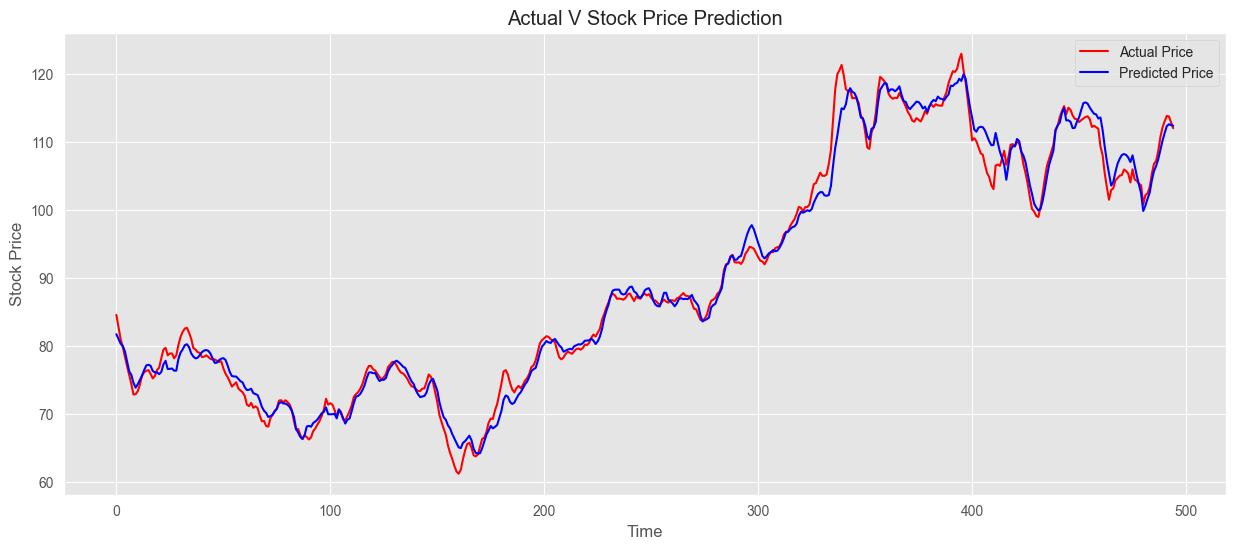

In [30]:
plot_predictions(test_label, predicted, "Actual V Stock Price Prediction")

In [31]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate performance metrics
mse = mean_squared_error(test_label, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_label, predicted)
mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 6.500888102519324
Root Mean Squared Error (RMSE): 2.549683922081191
Mean Absolute Error (MAE): 1.8660352237846838
Mean Absolute Percentage Error (MAPE): 2.09%


Text(0, 0.5, 'Closing price')

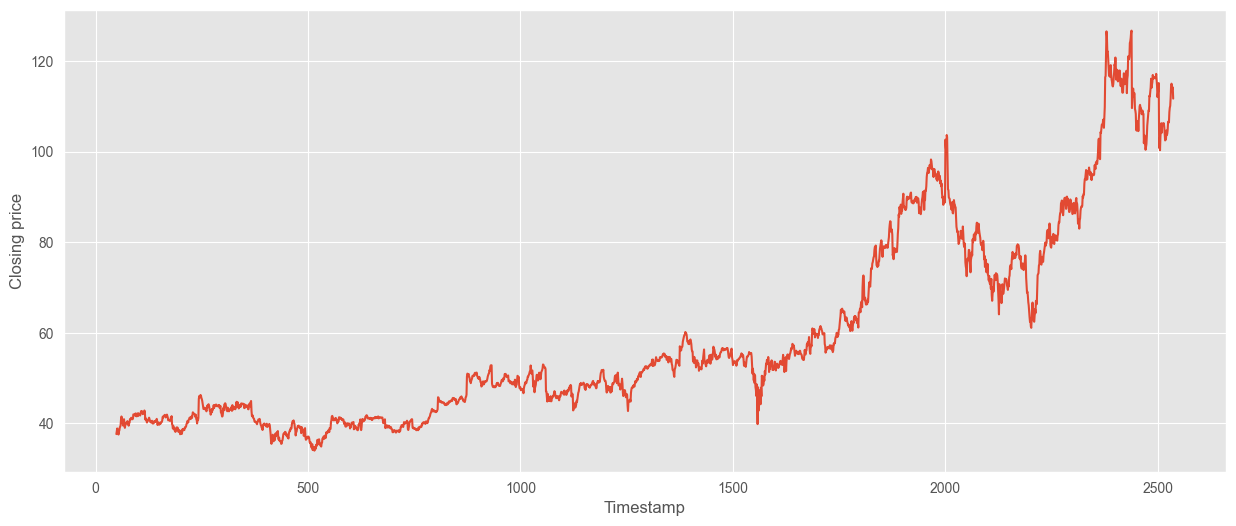

In [32]:
# plot the full dataset

plt.figure(figsize=(15, 6))
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")


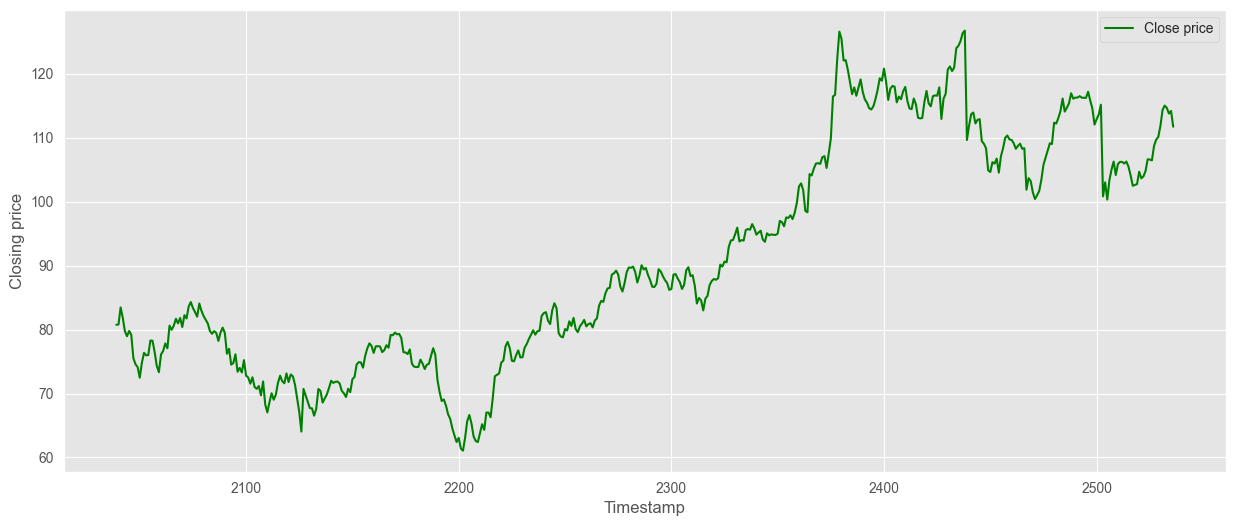

In [33]:
# Plot the last 20% of the data

plt.figure(figsize=(15, 6))
last_20_percent = data['Close'].iloc[int(len(data) * 0.8):]
plt.plot(last_20_percent.index, last_20_percent.values, label="Close price", color='green')
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
plt.legend()

In [34]:
# save the model
model.save('improved_cnn_lstm_model.h5')